In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
diamonds = pd.read_csv('diamonds.csv', sep=',')

In [6]:
# 1.1 normalizing data
q1 = diamonds['table'].quantile(0.25)
q3 = diamonds['table'].quantile(0.75)
iqr = (q3-q1)*1.5
df_his = diamonds[(diamonds.table >= q1-iqr) & (diamonds.table <= q3 + iqr)]

Text(0.5, 1.0, 'Рисунок распределения алмазов по площадке')

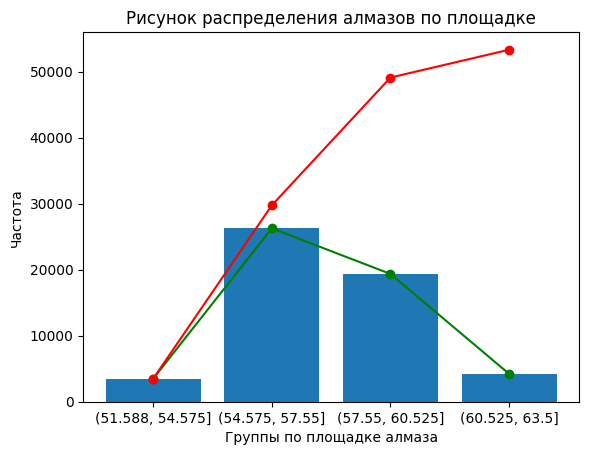

In [7]:
fig1 = plt.figure()
ax1 = fig1.add_subplot()

# 1.2 creating an additional data frame using pd.cut() and an additional column for cumul values
df_his_bins = pd.DataFrame(pd.cut(df_his['table'], bins=4).astype(str).value_counts())
df_his_bins = df_his_bins.sort_values(by=['table'])
df_his_bins['cumul'] = np.cumsum(df_his_bins['count'])

# # 1.3 histogram, polygon and cumul, using the methods given
ax1.bar(df_his_bins.index.values, df_his_bins['count'].values)
ax1.plot(df_his_bins['count'].values, c="green")
ax1.scatter(df_his_bins.index.values, df_his_bins['count'].values, c="green")
ax1.plot(df_his_bins['cumul'].values, c='red')
ax1.scatter(df_his_bins.index.values, df_his_bins['cumul'].values, c='red')
# # 1.4 setting the titles
ax1.set_xlabel('Группы по площадке алмаза')
ax1.set_ylabel('Частота')
ax1.set_title('Рисунок распределения алмазов по площадке')

Text(0.5, 1.0, 'Диаграмма соотношения числа алмазов по качеству огранки')

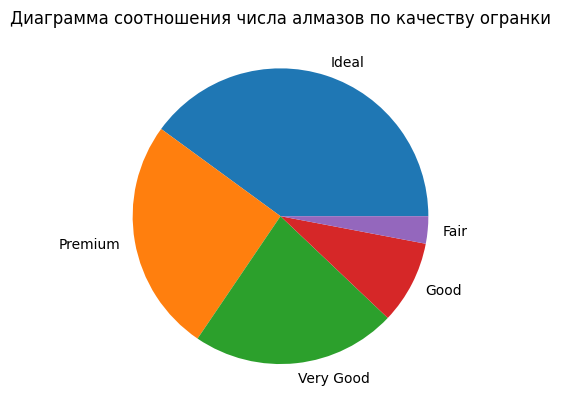

In [8]:
# 2.1 circle diagram
fig2 = plt.figure()
ax2 = fig2.add_subplot()
df_circle = (diamonds['cut'].value_counts())
ax2.pie(df_circle, labels=df_circle.index.values)
ax2.set_title('Диаграмма соотношения числа алмазов по качеству огранки')

Text(0, 0.5, 'price')

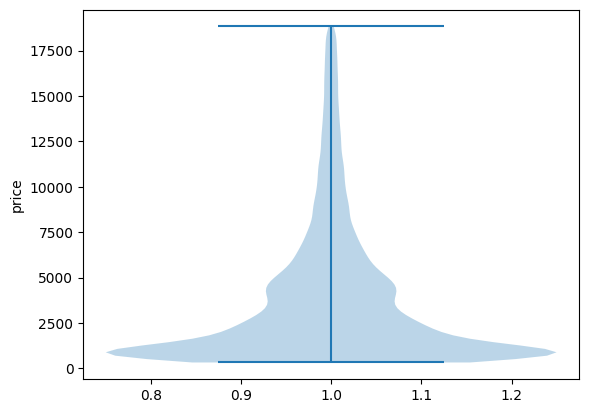

In [9]:
# violin plot
fig3 = plt.figure()
ax3 = fig3.add_subplot()
ax3.violinplot(diamonds['price'])
ax3.set_ylabel('price')

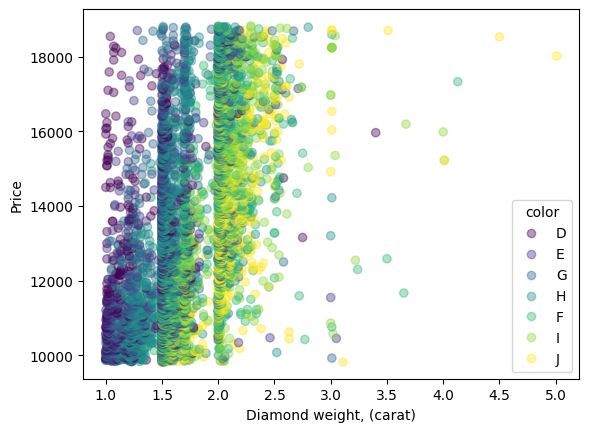

In [10]:
# scatter plot
fig4 = plt.figure()
ax4 = fig4.add_subplot()
# filtering data
df_sc = diamonds[diamonds.price > diamonds['price'].quantile(0.9)]
sp_names = set(df_sc.color)
sct = ax4.scatter(df_sc.carat, df_sc.price, alpha=0.4, c = df_sc.color.astype('category').cat.codes )
ax4.legend(handles=sct.legend_elements()[0], labels=sp_names, title="color")
ax4.set_xlabel('Diamond weight, (carat)')
ax4.set_ylabel('Price')
plt.show()